# Twitter data sentiment analysis

- ### 1.twitter data :- first step is to configure twitter api gether twitter data and clean the data
- ### 2. sentiment -: to find out sentiments
- ### 3.Analysis -: to do analysis

In [5]:
!pip install textblob

     |████████████████████████████████| 636 kB 4.4 MB/s eta 0:00:01


In [68]:
import tweepy # to gather twitter data
from textblob import TextBlob # to do or find sentiments
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # regex library useful for string data
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [ ]:
# get the twitter configuration and get the tweets

In [9]:
# Twitter api credentials
ApiKey = "Kpy5sPOLauw7ppmPnsHL8DdOm"
ApiSecretKey = "c2Vx49CUqF0utDzheqZcJIz0UIwQnufgWVivxuRIxd3H2hiqE8"
acessToken = "1159394066406055938-SxBF5281MtRF3tGWegPz570x31kGVP"
acessTokenSecret = "ahOg4rVQ1c1UMADmsAmY26xw0FYzY0QBwamyyjSXGaQXd"


In [11]:
# create the authentication object
authenticate = tweepy.OAuthHandler(ApiKey,ApiSecretKey)
authenticate.set_access_token(acessToken,acessTokenSecret)
api=tweepy.API(authenticate)

In [15]:
posts=api.user_timeline(screen_name='Dog',count=100,lang="en",tweet_mode='extended')

In [16]:
posts

[Status(_api=<tweepy.api.API object at 0x7fb6d97442b0>, _json={'created_at': 'Fri May 07 21:54:36 +0000 2021', 'id': 1390787173666938883, 'id_str': '1390787173666938883', 'full_text': 'update: I just refilled their pinot noir', 'truncated': False, 'display_text_range': [0, 40], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1390325936944467968, 'in_reply_to_status_id_str': '1390325936944467968', 'in_reply_to_user_id': 407553, 'in_reply_to_user_id_str': '407553', 'in_reply_to_screen_name': 'dog', 'user': {'id': 407553, 'id_str': '407553', 'name': 'Christine', 'screen_name': 'dog', 'location': 'Massachusetts ', 'description': 'Poet, professional geek, and cyclist. Member of @pedalpowerteam and past volunteer leader for @edmarkey for Senate. Opinions my own. She/her.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'follo

In [86]:
# To get the twitter data
posts=api.user_timeline(screen_name='ascmkk',count=100,lang="en",tweet_mode='extended')
i=1
for tweet in posts[:10]: # just want to see top 10 from 100
    print(str(i)+') ' + tweet.full_text+ '\n')
    i=i+1

1) RT @JhaSanjay: The government’s attitude seems to be: We are there for another 3 years, without any threats or opposition. At some point, w…

2) RT @JhaSanjay: Dear #AdarPoonawalla 
Please name the powerful people making these threatening calls to you. At this crisis hour, we need to…

3) RT @palkisu: After sending reporters for weeks-long assignments to cover elections and broadcasting exit polls, some news channels have sud…

4) @PoliticalKida I don't need any Navjot Dahiya to show me how the PM acted like a BJP campaigner when the nation needed him as the PM.

5) If there is no shortage sir @myogiadityanath please provide one cylinder per bed. I am here. I am watching.

6) Yes, my grandmother is also admitted in same hospital. I was there when @ka_nupriya's mother died. @dmunnao At least allot one cylinder per bed so the staff doesn't have to do the juggling which may result in saving some lives.

7) @myogiadityanath says there is no shortage of oxygen. I dont know which state he

In [87]:
# create a data frame with a columns called tweets
dataFrame = pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

In [88]:
dataFrame

,Tweets
0,RT @JhaSanjay: The government’s attitude seems...
1,RT @JhaSanjay: Dear #AdarPoonawalla \nPlease n...
2,RT @palkisu: After sending reporters for weeks...
3,@PoliticalKida I don't need any Navjot Dahiya ...
4,If there is no shortage sir @myogiadityanath p...
...,...
95,RT @ShekharGupta: What legal doctrine does the...
96,RT @ShekharGupta: This is Avery important poin...
97,@Bees_Kut Ibuprofen*
98,@ShabbirABashir1 They did it to get into the g...


In [89]:
# Data cleaning

In [90]:
dir(re)

['A',
 'ASCII',
 'DEBUG',
 'DOTALL',
 'I',
 'IGNORECASE',
 'L',
 'LOCALE',
 'M',
 'MULTILINE',
 'Match',
 'Pattern',
 'RegexFlag',
 'S',
 'Scanner',
 'T',
 'TEMPLATE',
 'U',
 'UNICODE',
 'VERBOSE',
 'X',
 '_MAXCACHE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_cache',
 '_compile',
 '_compile_repl',
 '_expand',
 '_locale',
 '_pickle',
 '_special_chars_map',
 '_subx',
 'compile',
 'copyreg',
 'enum',
 'error',
 'escape',
 'findall',
 'finditer',
 'fullmatch',
 'functools',
 'match',
 'purge',
 'search',
 'split',
 'sre_compile',
 'sre_parse',
 'sub',
 'subn',
 'template']

In [91]:
# make a function to clean the tweets
def cleanTxt(text):
    text= re.sub('@[A-Za=z0-9]+','',text) # removing unwanted char  , mentions
    text = re.sub("#",'',text)  # removing hash #
    text = re.sub('RT[\s]+','',text) # removing retweets
    text = re.sub('https?:\/\/\S+','',text) # removing links
    return text

In [92]:
dataFrame['Tweets'] = dataFrame['Tweets'].apply(cleanTxt)

In [93]:
dataFrame


,Tweets
0,haSanjay: The government’s attitude seems to b...
1,haSanjay: Dear AdarPoonawalla \nPlease name th...
2,@palkisu: After sending reporters for weeks-lo...
3,oliticalKida I don't need any Navjot Dahiya to...
4,If there is no shortage sir @myogiadityanath p...
...,...
95,hekharGupta: What legal doctrine does the cour...
96,hekharGupta: This is Avery important point. It...
97,ees_Kut Ibuprofen*
98,habbirABashir1 They did it to get into the goo...


In [94]:
analysis = TextBlob("Today was the good day")

In [95]:
analysis.sentiment  # polarity mean how much +ve or -Ve it is and subjectivity means it's public opinion
# subjectivity also means some personal feelings , views etc . it's a opinion.. how much personal is it?

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [96]:
# Let's Find out the sentiments

In [97]:
analysis = TextBlob("Today was the bad day")
analysis.sentiment 

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [98]:
analysis = TextBlob("Today was the best day")
analysis.sentiment 

Sentiment(polarity=1.0, subjectivity=0.3)

In [99]:
# Create a func to get the subjectivity of all the tweets
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a func to get the polarity of all the tweets
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

# Create 2 columns 'subjectivity' and 'polarity'

dataFrame['Subjectivity'] = dataFrame['Tweets'].apply(getSubjectivity)
dataFrame['Polarity'] = dataFrame['Tweets'].apply(getpolarity)

In [100]:
# sentiment is done here
dataFrame

,Tweets,Subjectivity,Polarity
0,haSanjay: The government’s attitude seems to b...,0.000000,0.000000
1,haSanjay: Dear AdarPoonawalla \nPlease name th...,1.000000,0.300000
2,@palkisu: After sending reporters for weeks-lo...,0.000000,0.000000
3,oliticalKida I don't need any Navjot Dahiya to...,0.000000,0.000000
4,If there is no shortage sir @myogiadityanath p...,0.000000,0.000000
...,...,...,...
95,hekharGupta: What legal doctrine does the cour...,0.200000,0.200000
96,hekharGupta: This is Avery important point. It...,0.550000,0.200000
97,ees_Kut Ibuprofen*,0.000000,0.000000
98,habbirABashir1 They did it to get into the goo...,0.527273,0.418182


In [101]:
dataFrame['Tweets'][0]

'haSanjay: The government’s attitude seems to be: We are there for another 3 years, without any threats or opposition. At some point, w…'

In [102]:
#Let;s do analysis

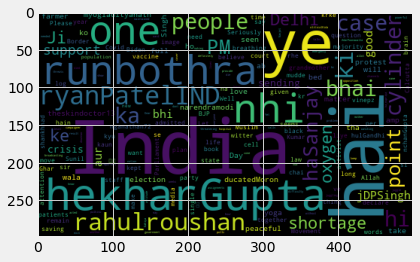

In [122]:
# Word Cloud visualization
allwords = ' '.join([i for i in dataFrame['Tweets']])
Cloud = WordCloud(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [104]:
# Create a func to compute negative neutral and positive

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    
    elif score==0:
        return 'Neutral'
    
    else:
        return 'Positive'
    
dataFrame['Analysis'] = dataFrame['Polarity'].apply(getAnalysis)


In [105]:
dataFrame

,Tweets,Subjectivity,Polarity,Analysis
0,haSanjay: The government’s attitude seems to b...,0.000000,0.000000,Neutral
1,haSanjay: Dear AdarPoonawalla \nPlease name th...,1.000000,0.300000,Positive
2,@palkisu: After sending reporters for weeks-lo...,0.000000,0.000000,Neutral
3,oliticalKida I don't need any Navjot Dahiya to...,0.000000,0.000000,Neutral
4,If there is no shortage sir @myogiadityanath p...,0.000000,0.000000,Neutral
...,...,...,...,...
95,hekharGupta: What legal doctrine does the cour...,0.200000,0.200000,Positive
96,hekharGupta: This is Avery important point. It...,0.550000,0.200000,Positive
97,ees_Kut Ibuprofen*,0.000000,0.000000,Neutral
98,habbirABashir1 They did it to get into the goo...,0.527273,0.418182,Positive


In [106]:
dataFrame['Analysis'].value_counts()

Neutral     57
Positive    24
Negative    19
Name: Analysis, dtype: int64

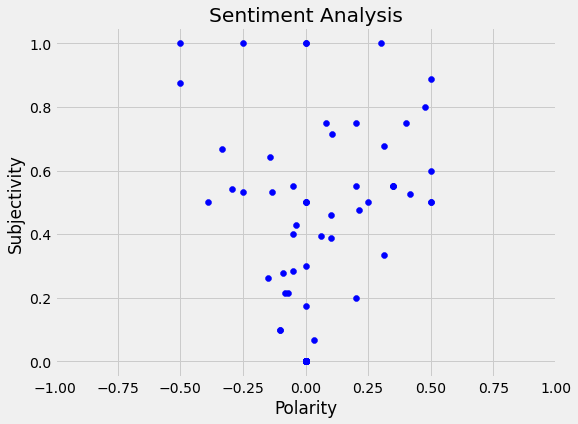

In [107]:
# Plotting scatter plot 
plt.figure(figsize=(8,6))
for i in range(0,dataFrame.shape[0]):
    plt.scatter(dataFrame['Polarity'][i],dataFrame['Subjectivity'][i],color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [108]:
dataFrame[dataFrame['Analysis']=="Neutral"]
# only 3 neutral is showing coz it's overlapping

,Tweets,Subjectivity,Polarity,Analysis
0,haSanjay: The government’s attitude seems to b...,0.000,0.0,Neutral
2,@palkisu: After sending reporters for weeks-lo...,0.000,0.0,Neutral
3,oliticalKida I don't need any Navjot Dahiya to...,0.000,0.0,Neutral
4,If there is no shortage sir @myogiadityanath p...,0.000,0.0,Neutral
6,@myogiadityanath says there is no shortage of ...,0.500,0.0,Neutral
8,wanishSharan: Can try this also during ‘Home I...,0.000,0.0,Neutral
10,@narendramodi Bada ehsaan kar diya sir.,0.000,0.0,Neutral
13,darpoonawalla: On behalf of the vaccine indust...,0.000,0.0,Neutral
14,Bruh,0.000,0.0,Neutral
16,@onlinecolloquy:,0.000,0.0,Neutral


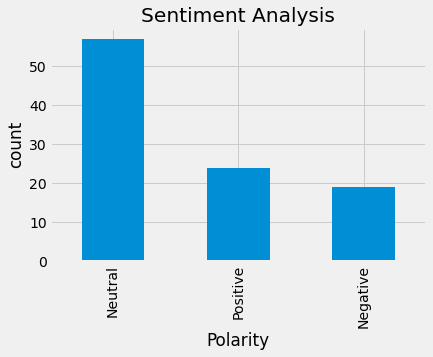

In [109]:
dataFrame['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('count')
plt.show()

In [110]:
# input of username and number of tweets

In [111]:
# Let's get positive tweets only
i=1
sortedDF = dataFrame.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Positive'):
        
        print(str(i)+')' + sortedDF['Tweets'][j])
        print()
        i+=1

1)haSanjay: Dear AdarPoonawalla 
Please name the powerful people making these threatening calls to you. At this crisis hour, we need to…

2)hekharGupta: As a child of the sixties, I’ve seen every crisis, incl 3 full wars, food shortages, calamities. This is our biggest post…

3)haSanjay: Let's get this straight: Serum Institute of India and Bharat Biotech are private companies ( like Pfizer, Moderna etc) and M…

4)runbothra: Some crooks are posting pics of life saving medicines including Remdesivir on social media and taking orders with advance…

5)hulGandhi Kerala me full on campaign krke bta rhe hain Bengal me rally nhi krenge kyuki vha koi chance hi nhi jeet ka.

6)@rahulroushan: Organizing a massive protest against Kumbh Mela being hosted amidst Covid. Join me in large numbers at Chandni Chowk at 5…

7): @itsprxya I love curry

8)nganathan72: I love Election season. Fuel prices remain unchanged; inflation is kept low; Small Savings' rate is kept high, and if,…

9)@theskindoctor13: 

In [112]:
# Let's get negative tweets only
i=1
sortedDF = dataFrame.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Negative'):
        
        print(str(i)+')' + sortedDF['Tweets'][j])
        print()
        i+=1

1)Yes, my grandmother is also admitted in same hospital. I was there when @ka_nupriya's mother died. @dmunnao At least allot one cylinder per bed so the staff doesn't have to do the juggling which may result in saving some lives.

2)There are 24 beds in emergency ward. Majority of cases come with breathing problems. Yet there are only 9-10 oxygen cylinders. Staff has to juggle those cylinders between patients to keep everyone's oxygen level maintained. Seriously ill patients are dying because of this. 

3)hekharGupta The woman and man guilty of adultery or fornication, flog each of them with 100 stripes: Let not compassion move u in their case, in a matter prescribed by Allah, if u believe in Allah and the Last Day and let a party of the Believers witness their punishment (Sura al-Nur 24:2)

4)euro_Skeptic: The brain is made up of billions of brain cells. Alone, a single cell has no intelligence whatsoever. But together, they…

5)State election me center ke liye anti incumbency kyu nhi

In [113]:
# Let's get neutral tweets only
i=1
sortedDF = dataFrame.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Neutral'):
        
        print(str(i)+')' + sortedDF['Tweets'][j])
        print()
        i+=1

1)haSanjay: The government’s attitude seems to be: We are there for another 3 years, without any threats or opposition. At some point, w…

2)@palkisu: After sending reporters for weeks-long assignments to cover elections and broadcasting exit polls, some news channels have sud…

3)oliticalKida I don't need any Navjot Dahiya to show me how the PM acted like a BJP campaigner when the nation needed him as the PM.

4)If there is no shortage sir @myogiadityanath please provide one cylinder per bed. I am here. I am watching.

5)@myogiadityanath says there is no shortage of oxygen. I dont know which state he talks about bc there is definitely a shortage of oxygen cylinders where my grandmother is admitted. I have seen about 10-12 people die in 2 days majority cases of difficulty in breathing.

6)wanishSharan: Can try this also during ‘Home Isolation’ 

7)@narendramodi Bada ehsaan kar diya sir.

8)darpoonawalla: On behalf of the vaccine industry in India, I would like to thank and applaud Shri